Seattle Drug Geography


In [374]:
# --- Imports ---
import sys,os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import folium
from IPython.display import HTML
from IPython.display import Image
%matplotlib inline

In [500]:
# pull in data
SeattleDrug=pd.read_csv(os.getcwd()+'/SeattleDrug.csv')

# Fill in the NaN data with '-1' as a placeholder
SeattleDrug.fillna('-1', inplace=True)
SeattleDrug = SeattleDrug[SeattleDrug['Zone/Beat'] != '-1']

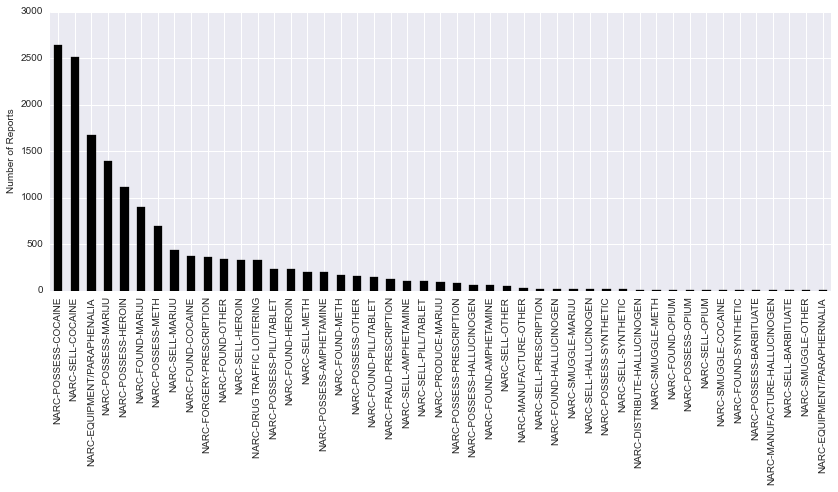

In [377]:
# Sort the crimes by offense type and by date

types=SeattleDrug.groupby('Offense Type').size()
types.sort(ascending=False)
types.plot(kind='bar',figsize=(14,5),color='k')
plt.xlabel('')
plt.ylabel('Number of Reports', fontsize=10)

*** Re-define the Zone - Hood mapping ***

In [501]:
# I could not find how police beat zones correlated with neighborhood, so I manually estimated the neighborhoods and added a column into my original data frame.

beat2neighborhood_df=pd.read_csv(os.getcwd()+'/SeattleZoneBeats.csv')
beat2neighborhood_df=beat2neighborhood_df[['ZoneBeat','Neighborhood']]

In [502]:
# Merge hood data with drug data

SeattleDrug=pd.merge(SeattleDrug,beat2neighborhood_df,left_on=u'Zone/Beat',right_on='ZoneBeat',how='outer').fillna(0)
SeattleDrug.head(3)

,���RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,...,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year,ZoneBeat,Neighborhood
0,1109827,2014295909,3502,0,NARC-DISTRIBUTE-HALLUCINOGEN,3500,NARCOTICS,9/4/14 22:15,9/4/14 22:15,-1,...,M,M2,8100.2,-122.337320,47.611321,"(47.611321238, -122.337320424)",9,2014,M2,Downtown
1,453925,2014295909,3502,0,NARC-DISTRIBUTE-HALLUCINOGEN,3500,NARCOTICS,9/4/14 22:15,9/4/14 22:15,-1,...,M,M2,8100.2,-122.337320,47.611321,"(47.611321238, -122.337320424)",9,2014,M2,Downtown
2,347508,2009300507,3502,0,NARC-DISTRIBUTE-HALLUCINOGEN,3500,NARCOTICS,8/25/09 16:48,8/25/09 15:10,-1,...,M,M2,8200.101,-122.332248,47.612070,"(47.61207009, -122.332248067)",8,2009,M2,Downtown


In [ ]:
# Harder way to to this. See above!
# I could not find how police beat zones correlated with neighborhood, so I manually estimated the neighborhoods and added a column into my original data frame.
 
beat2neighborhood_df = pd.read_csv(os.getcwd()+'/SeattleZoneBeats.csv')
beat2neighborhood = {}
for i, row in beat2neighborhood_df.iterrows():
    zone = row['ZoneBeat']
    ne = row['Neighborhood']
    beat2neighborhood[zone] = ne
neighborhoods = [beat2neighborhood[beat] for beat in SeattleDrug['Zone/Beat']]
series = pd.Series(neighborhoods)
SeattleDrug['Neighborhood'] = series
SeattleDrug.fillna(0,inplace=True)
SeattleDrug.head(5)

*** Look at specific category ***

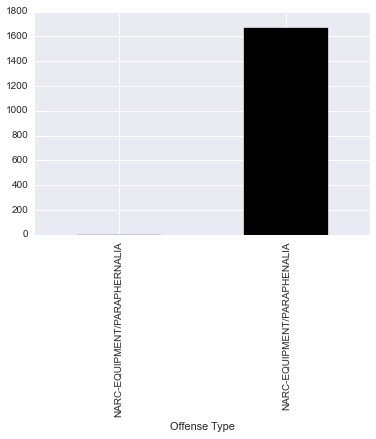

In [507]:
para = SeattleDrug.loc[SeattleDrug['Offense Type'].str.contains('PARAPHE')]
p=para.groupby('Offense Type').size()
p.sort()
p.plot(kind='bar',color='k')

In [510]:
# There are many categories that fall under one superset, so let's recategorize the data 

SeattleDrug.loc[SeattleDrug['Offense Type'].str.contains('COCAINE'),'Offense Type']='COKE'
SeattleDrug.loc[SeattleDrug['Offense Type'].str.contains('MARIJU'),'Offense Type']='WEED'
SeattleDrug.loc[SeattleDrug['Offense Type'].str.contains('METH'),'Offense Type']='METH'
SeattleDrug.loc[SeattleDrug['Offense Type'].str.contains('HEROIN'),'Offense Type']='HEROIN'
SeattleDrug.loc[SeattleDrug['Offense Type'].str.contains('OPIUM'),'Offense Type']='OPIUM'
SeattleDrug.loc[SeattleDrug['Offense Type'].str.contains('HALLUCINOGEN'),'Offense Type']='HALLUCINOGEN'
SeattleDrug.loc[SeattleDrug['Offense Type'].str.contains('PILL'),'Offense Type']='PILLS'
SeattleDrug.loc[SeattleDrug['Offense Type'].str.contains('SYNTHETIC'),'Offense Type']='SYNTHETIC'
SeattleDrug.loc[SeattleDrug['Offense Type'].str.contains('PRESCRIPTION'),'Offense Type']='PRESCRIPTION'
SeattleDrug.loc[SeattleDrug['Offense Type'].str.contains('OTHER'),'Offense Type']='OTHER'
SeattleDrug.loc[SeattleDrug['Offense Type'].str.contains('OPIUM'),'Offense Type']='OPIUM'
SeattleDrug.loc[SeattleDrug['Offense Type'].str.contains('BARBITUATE'),'Offense Type']='BARBITUATE'
SeattleDrug.loc[SeattleDrug['Offense Type'].str.contains('PARAPHE'),'Offense Type']='PARAPHENALIA'
SeattleDrug.loc[SeattleDrug['Offense Type'].str.contains('AMPHETAMINE'),'Offense Type']='AMPHETAMINE'
SeattleDrug.loc[SeattleDrug['Offense Type'].str.contains('DRUG TRAFFIC LOITERING'),'Offense Type']='DRUG TRAFFIC LOITERING'

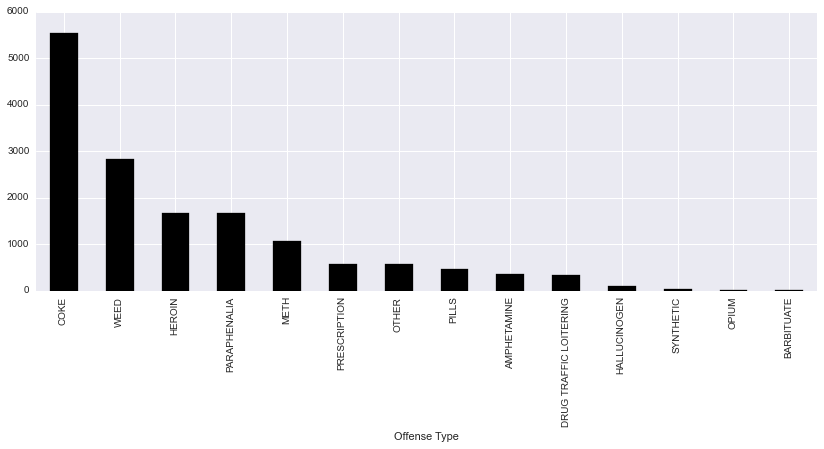

In [511]:
# Replot the data so that I see it by these regrouped categories.
types=SeattleDrug.groupby('Offense Type').size()
types.sort(ascending=False)
types.plot(kind='bar',figsize=(14,5),color='k')

*** Dataframes for each drug category ***

In [401]:
SeattleDrug.index=pd.DatetimeIndex(SeattleDrug['Date Reported'])
SeattleDrug['date']=SeattleDrug.index.date
SeattleDrug['year']=SeattleDrug.index.year
SeattleDrug['month']=SeattleDrug.index.month

coke_crime=SeattleDrug[SeattleDrug['Offense Type']=='COKE']
weed_crime=SeattleDrug[SeattleDrug['Offense Type']=='WEED']
meth_crime=SeattleDrug[SeattleDrug['Offense Type']=='METH']
her_crime=SeattleDrug[SeattleDrug['Offense Type']=='HEROIN']
para_crime=SeattleDrug[SeattleDrug['Offense Type']=='PARAPHENALIA']
prescrip_crime=SeattleDrug[SeattleDrug['Offense Type']=='PRESCRIPTION']
other_crime=SeattleDrug[SeattleDrug['Offense Type']=='OTHER']
pill_crime=SeattleDrug[SeattleDrug['Offense Type']=='PILLS']
amph_crime=SeattleDrug[SeattleDrug['Offense Type']=='AMPHETAMINE']
traf_crime=SeattleDrug[SeattleDrug['Offense Type']=='DRUG TRAFFIC LOITERING']
hallu_crime=SeattleDrug[SeattleDrug['Offense Type']=='HALLUCINOGEN']
synth_crime=SeattleDrug[SeattleDrug['Offense Type']=='SYNTHETIC']
opi_crime=SeattleDrug[SeattleDrug['Offense Type']=='OPIUM']
barb_crime=SeattleDrug[SeattleDrug['Offense Type']=='BARBITUATE']

In [402]:
''' 

Re-defined all of this below, so don't need this code.

'''

def types_districts(SeattleDrug, per):
    
    # Group by crime type and district 
    hoods_per_type=SeattleDrug.groupby('Offense Type')['Neighborhood'].value_counts(sort=True)
    t=hoods_per_type.unstack().fillna(0)
    
    # Sort by hood sum
    hood_sum=t.sum(axis=0)
    hood_sum.sort(ascending=False)
    t=t[hood_sum.index]
    
    # Filter by crime per district
    crime_sum=t.sum(axis=1)
    crime_sum.sort()
    
    # Large number, so let's slice the data.
    p=np.percentile(crime_sum,per)
    ix=crime_sum[crime_sum>p]
    t=t.loc[ix.index]
    return t
    
t=types_districts(SeattleDrug, 0)

*** `Group by - fu` ***

In [415]:
# Slice data by a field and write to new dataframe AMPHETAMINE_crime
AMPHETAMINE_crime = SeattleDrug[SeattleDrug['Offense Type'] == 'AMPHETAMINE']
print AMPHETAMINE_crime.shape
AMPHETAMINE_crime.head(1)

(357, 23)


,���RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,...,Census Tract 2000,Longitude,Latitude,Location,Month,Year,Neighborhood,date,year,month
2015-09-06 20:54:00,540733,2015313117,X,61,AMPHETAMINE,X,NARCOTICS,9/6/15 20:54,9/6/15 13:49,-1,...,9701.3,-122.409333,47.579509,"(47.579508523, -122.409332686)",9,2015,Madrona,2015-09-06,2015,9


In [417]:
# An easier way to do that for all crime types

crimes_by_type = SeattleDrug.groupby(['Offense Type']).size()
crimes_by_type.sort(ascending=False)
crimes_by_type.head(3)

Offense Type
COKE      5531
WEED      2836
HEROIN    1678
dtype: int64

In [420]:
# We really want to know crimes by hood and category! 

SeattleDrug_by_Hood=SeattleDrug.groupby(['Offense Type','Neighborhood']).size().unstack().fillna(0)
SeattleDrug_by_Hood.head(3)

Neighborhood,Ballard,Beacon Hill,Belltown,Bitter Lake,Capitol Hill,Delridge,Downtown,Eastlake,First Hill,Fremont,...,Ravenna,SODO,Seward Park,South Lake Union,University District,Unknown,Wallingford,West Seattle,Westlake,White Center
Offense Type,,,,,,,,,,,,,,,,,,,,,
AMPHETAMINE,3,2,5,5,87,6,41,2,16,5,...,4,8,1,9,4,1,4,2,8,10
BARBITUATE,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
COKE,27,51,326,36,286,16,1823,5,154,31,...,12,48,78,60,33,34,14,31,102,50


In [425]:
# We want to know, for every hood what is the distribution
# Sum(axis=0) is the sum of each col
# Divide each row by that sum

SeattleDrug_by_Hood_n=SeattleDrug_by_Hood.div(SeattleDrug_by_Hood.sum(axis=0),axis=1)

*** Clustering by HOODS ***

* Agg data for fewer hoods 
* Reduce drugs

Will look pretty [close to SF](http://lmart999.github.io/2015/02/28/gis/):

* CRACK / COKE
* PERI. (define!)?
* HEROIN
* WEED
* METH

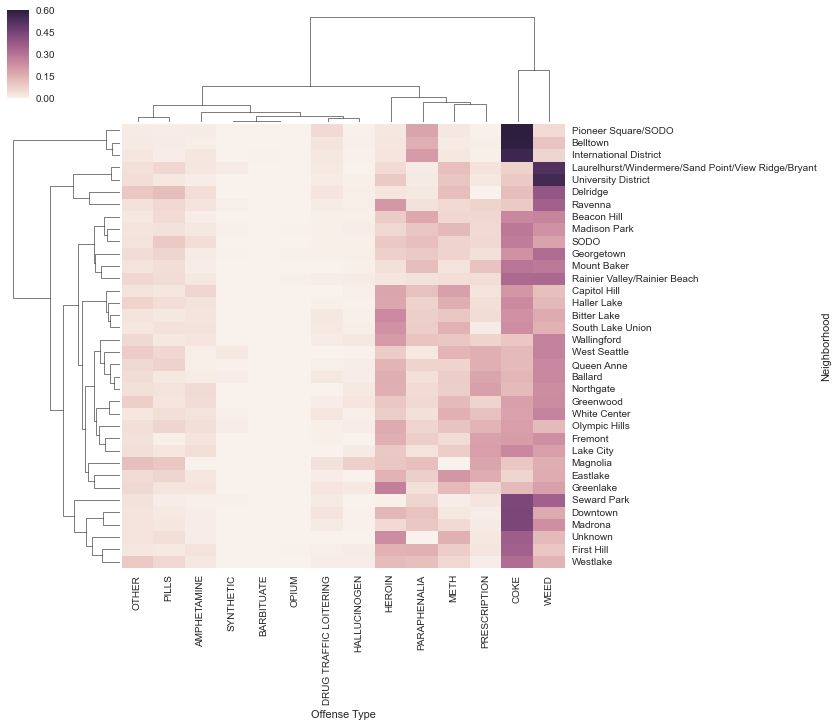

In [433]:
# Clustering by hood
sns.clustermap(SeattleDrug_by_Hood_n.transpose())

In [514]:
# Count top 6 only!

s=SeattleDrug_by_Hood.sum(axis=1)
s.sort(ascending=False)
top_cat=list(s.index[0:6])
top_cat

['COKE', 'WEED', 'HEROIN', 'PARAPHENALIA', 'METH', 'PRESCRIPTION']

In [518]:
# All data

SeattleDrug_by_Hood

Neighborhood,Ballard,Beacon Hill,Belltown,Bitter Lake,Capitol Hill,Delridge,Downtown,Eastlake,First Hill,Fremont,...,Ravenna,SODO,Seward Park,South Lake Union,University District,Unknown,Wallingford,West Seattle,Westlake,White Center
Offense Type,,,,,,,,,,,,,,,,,,,,,
AMPHETAMINE,3,2,5,5,87,6,41,2,16,5,...,4,8,1,9,4,1,4,2,8,10
BARBITUATE,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
COKE,27,51,326,36,286,16,1823,5,154,31,...,12,48,78,60,33,34,14,31,102,50
DRUG TRAFFIC LOITERING,5,1,17,4,2,4,127,1,4,1,...,2,1,3,5,5,0,2,0,4,7
HALLUCINOGEN,2,1,3,1,11,1,18,0,7,0,...,1,1,0,2,2,0,3,1,3,2
HEROIN,31,18,15,39,243,4,568,11,65,24,...,27,17,1,58,32,22,28,21,40,24
METH,17,13,8,16,256,16,93,16,37,8,...,7,12,2,38,35,14,14,34,20,41
OPIUM,0,0,0,0,1,0,6,0,2,0,...,0,0,0,0,0,0,0,0,0,0
OTHER,10,5,10,5,49,13,126,4,12,6,...,5,6,7,7,16,3,8,21,30,7


In [519]:
# Sliced by top 

SeattleDrug_by_Hood_top = SeattleDrug_by_Hood.loc[top_cat]
SeattleDrug_by_Hood_top 

Neighborhood,Ballard,Beacon Hill,Belltown,Bitter Lake,Capitol Hill,Delridge,Downtown,Eastlake,First Hill,Fremont,...,Ravenna,SODO,Seward Park,South Lake Union,University District,Unknown,Wallingford,West Seattle,Westlake,White Center
Offense Type,,,,,,,,,,,,,,,,,,,,,
COKE,27,51,326,36,286,16,1823,5,154,31,...,12,48,78,60,33,34,14,31,102,50
WEED,49,53,60,26,158,51,680,12,43,36,...,46,32,63,38,190,12,37,63,46,70
HEROIN,31,18,15,39,243,4,568,11,65,24,...,27,17,1,58,32,22,28,21,40,24
PARAPHENALIA,8,35,86,13,154,3,449,6,66,13,...,5,20,12,22,6,0,15,5,37,11
METH,17,13,8,16,256,16,93,16,37,8,...,7,12,2,38,35,14,14,34,20,41
PRESCRIPTION,35,13,4,8,44,0,47,12,13,29,...,9,10,5,4,8,2,10,37,3,31


In [520]:
SeattleDrug_by_Hood_top_n=SeattleDrug_by_Hood_top.div(SeattleDrug_by_Hood_top.sum(axis=0),axis=1)

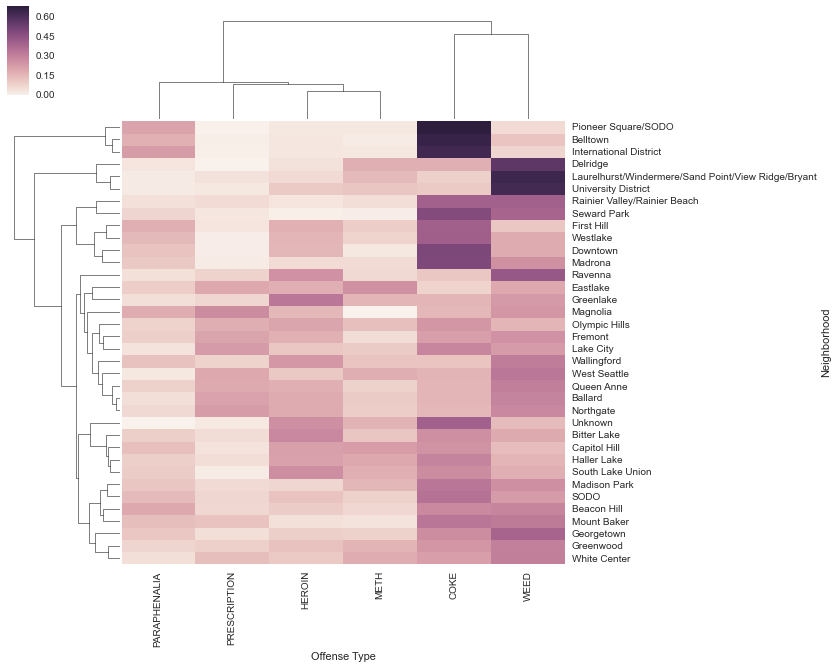

In [521]:
# Clustering by hood
sns.clustermap(SeattleDrug_by_Hood_top_n.transpose())

*** Timeseries ***

In [437]:
# Create a new column with year, month

SeattleDrug['Month_Year']=SeattleDrug['date'].apply(lambda x: x.strftime('%Y-%m'))
SeattleDrug.head(3)

,���RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,...,Longitude,Latitude,Location,Month,Year,Neighborhood,date,year,month,Month_Year
2014-09-04 22:15:00,1109827,2014295909,3502,0,HALLUCINOGEN,3500,NARCOTICS,9/4/14 22:15,9/4/14 22:15,-1,...,-122.337320,47.611321,"(47.611321238, -122.337320424)",9,2014,Downtown,2014-09-04,2014,9,2014-09
2014-09-04 22:15:00,453925,2014295909,3502,0,HALLUCINOGEN,3500,NARCOTICS,9/4/14 22:15,9/4/14 22:15,-1,...,-122.337320,47.611321,"(47.611321238, -122.337320424)",9,2014,Downtown,2014-09-04,2014,9,2014-09
2013-10-25 21:04:00,106121,2013387978,3502,0,HALLUCINOGEN,3500,NARCOTICS,10/25/13 21:04,10/25/13 19:07,-1,...,-122.333269,47.593836,"(47.5938359, -122.333268691)",10,2013,Pioneer Square/SODO,2013-10-25,2013,10,2013-10


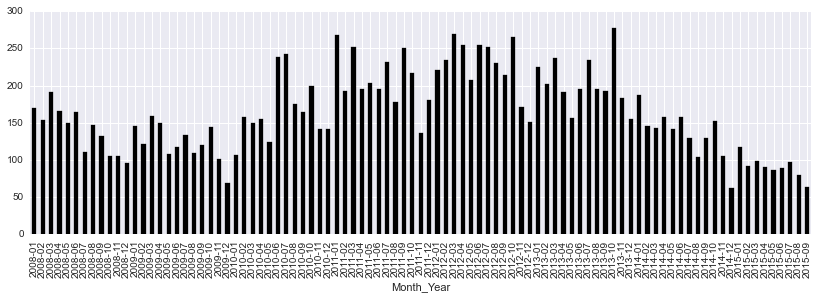

In [439]:
# Timeseries of Seattle drug data

s=SeattleDrug.groupby('Month_Year').size()
s.plot(figsize=(14,4),kind='bar',color='k')

In [441]:
off_ts=SeattleDrug.groupby(['Month_Year','Offense Type']).size().unstack().fillna(0)
off_ts.head(3)

Offense Type,AMPHETAMINE,BARBITUATE,COKE,DRUG TRAFFIC LOITERING,HALLUCINOGEN,HEROIN,METH,OPIUM,OTHER,PARAPHENALIA,PILLS,PRESCRIPTION,SYNTHETIC,WEED
Month_Year,,,,,,,,,,,,,,
2008-01,0,1,86,0,0,16,3,0,15,8,3,3,0,35
2008-02,1,0,79,0,2,12,5,0,7,10,0,4,0,34
2008-03,2,0,107,3,1,16,10,0,6,11,2,3,1,29


In [491]:
# Counts per drug category 
# Take top 5 drugs

s=off_ts.sum(axis=0)
s.sort(ascending=False)
top_cat=list(s.index[0:6])
top_cat

['COKE', 'WEED', 'HEROIN', 'PARAPHENALIA', 'METH', 'PRESCRIPTION']

In [459]:
# Raw data

off_ts.head(3)

Offense Type,AMPHETAMINE,BARBITUATE,COKE,DRUG TRAFFIC LOITERING,HALLUCINOGEN,HEROIN,METH,OPIUM,OTHER,PARAPHENALIA,PILLS,PRESCRIPTION,SYNTHETIC,WEED
Month_Year,,,,,,,,,,,,,,
2008-01,0,1,86,0,0,16,3,0,15,8,3,3,0,35
2008-02,1,0,79,0,2,12,5,0,7,10,0,4,0,34
2008-03,2,0,107,3,1,16,10,0,6,11,2,3,1,29


In [492]:
# Slicing a dataframe a by cols
# Pass a list into [ ]

off_ts_top=off_ts[top_cat]
off_ts_top.head(3)

Offense Type,COKE,WEED,HEROIN,PARAPHENALIA,METH,PRESCRIPTION
Month_Year,,,,,,
2008-01,86,35,16,8,3,3
2008-02,79,34,12,10,5,4
2008-03,107,29,16,11,10,3


In [463]:
# Slicing a dataframe by row

off_ts_top.loc['2008-01']

Offense Type
COKE            86
WEED            35
HEROIN          16
PARAPHENALIA     8
METH             3
Name: 2008-01, dtype: float64

In [464]:
# Slicing a dataframe by row and return a specific column

off_ts_top.loc['2008-01','WEED']

35.0

*** Timeseries ***

* Why have all gone down?
* Weed legalization; why still crimes but it's legal?
* Wh


*** Spatial ***

* Where are the weed crimes now? How has footprint changed?

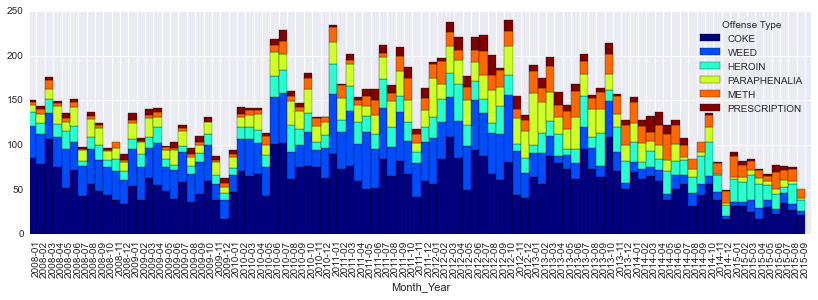

In [493]:
# Aggregate timeseries for top data

colors = plt.cm.jet(np.linspace(0, 1, len(top_cat)))
off_ts_top.plot(figsize=(14,4),kind='bar',stacked=True,width=1,color=colors)
plt.show()

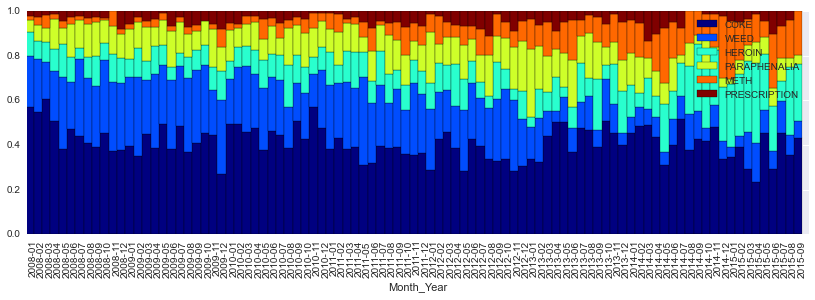

In [494]:
# Noralized data for top 

off_ts_n=off_ts_top.div(off_ts_top.sum(axis=1),axis=0)
off_ts_n.plot(figsize=(14,4),kind='bar',stacked=True,width=1,color=colors)
plt.legend(loc='upper right')
plt.ylim([0,1])
plt.show()

*** Hood breakdown ***

* Hood definitions too broad: try re-defining more narrowly

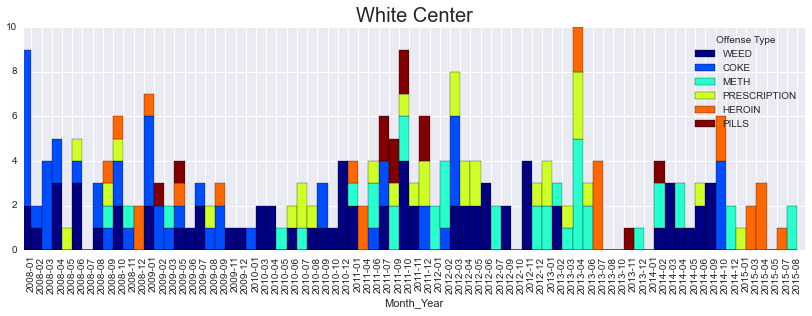

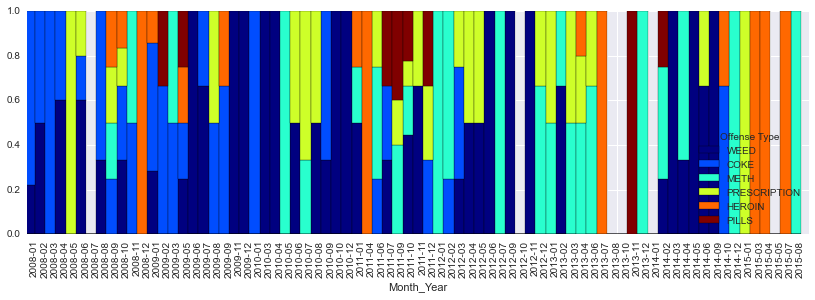

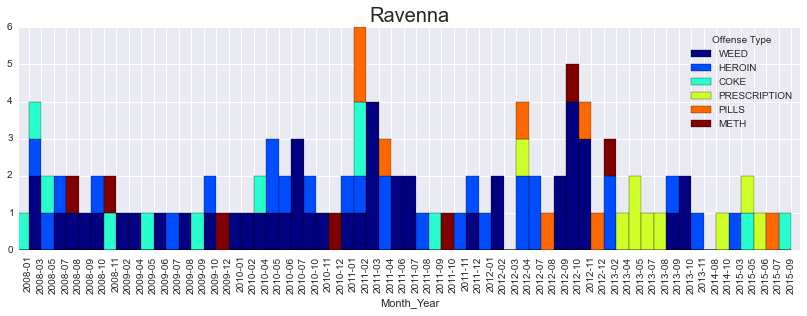

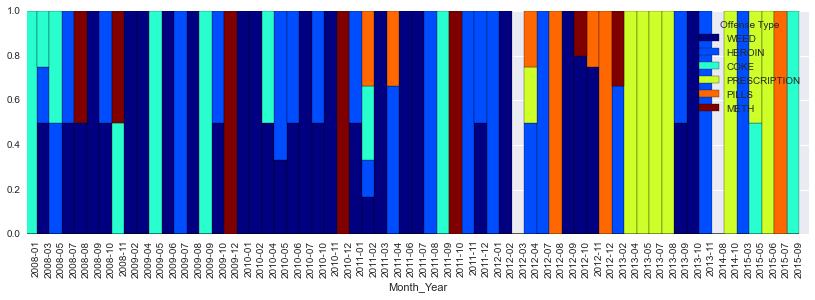

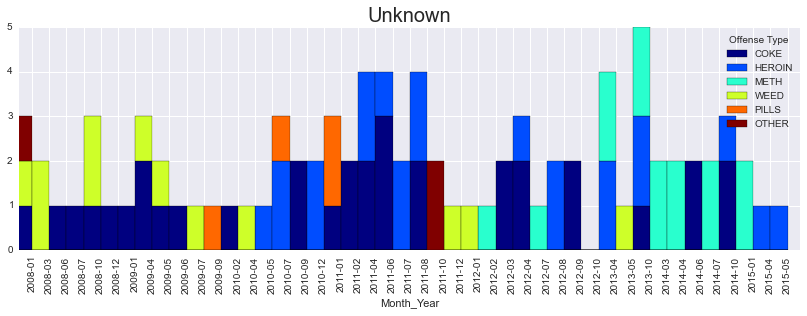

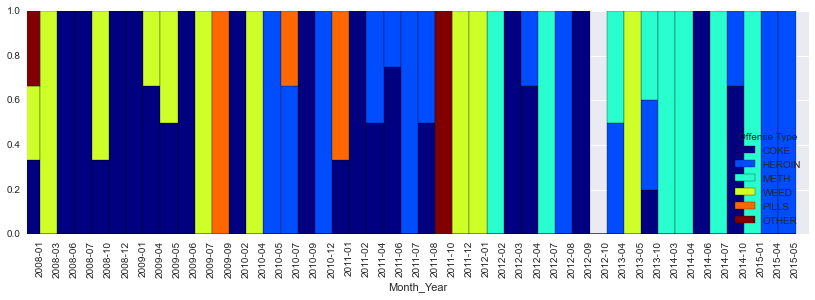

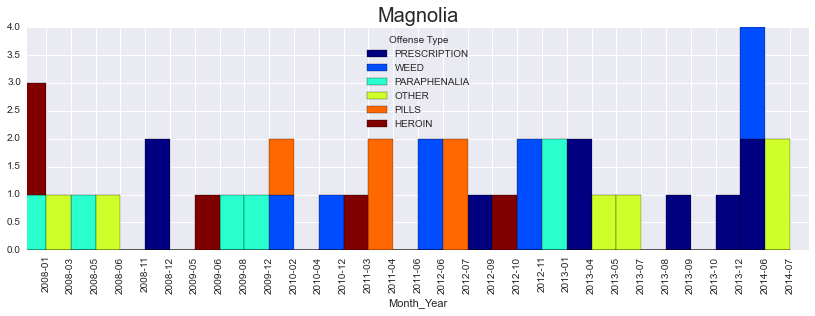

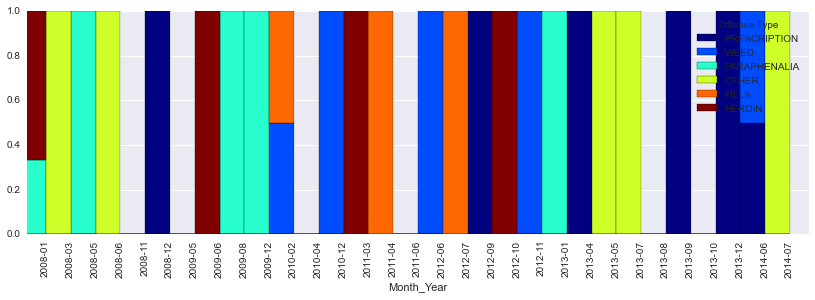

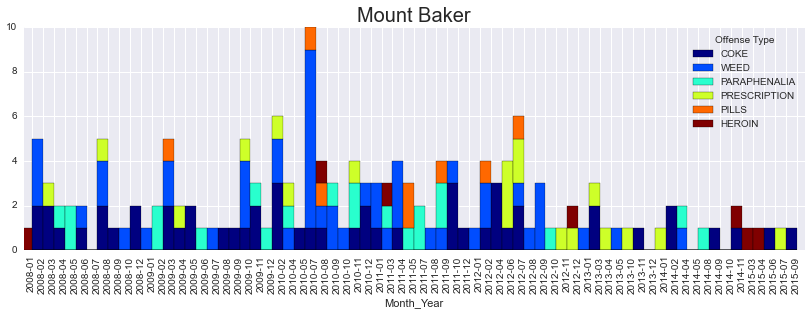

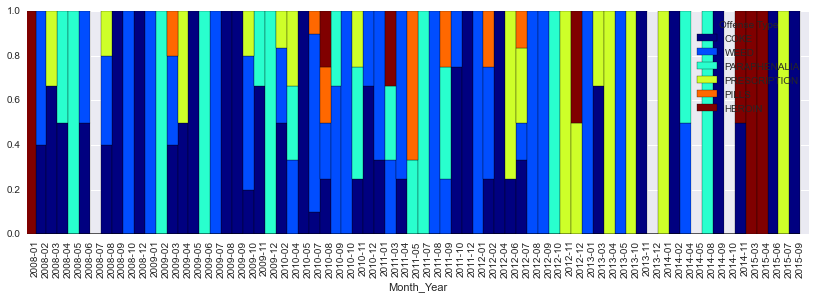

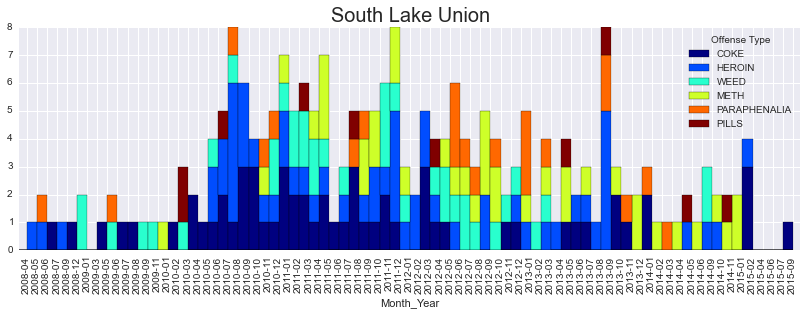

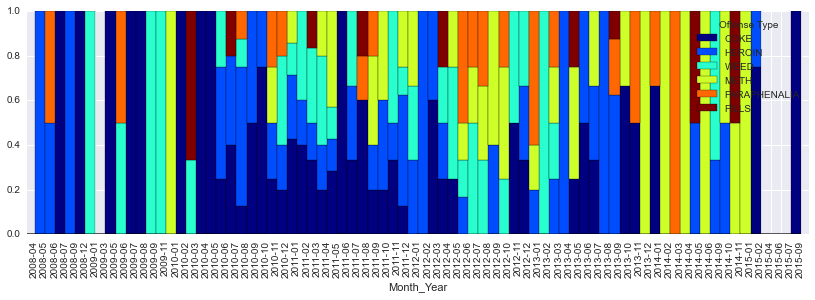

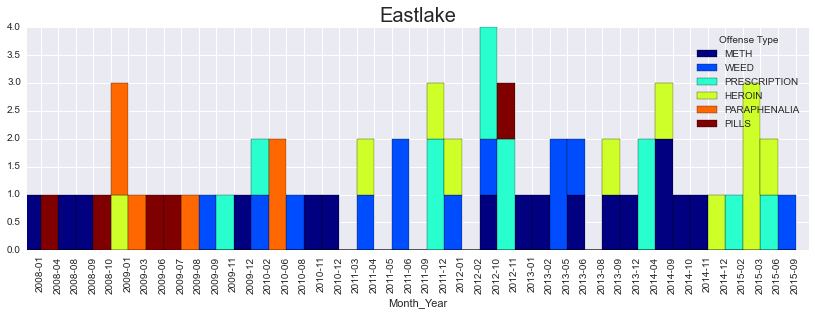

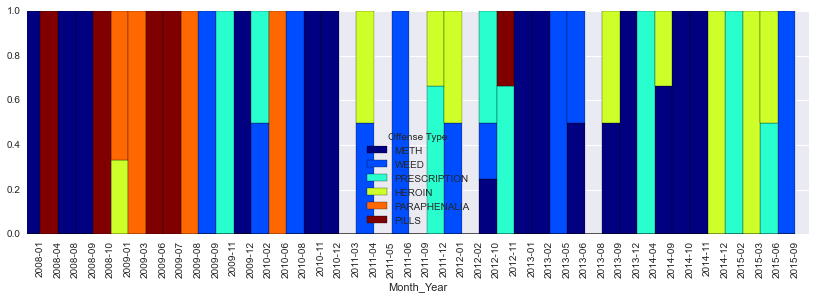

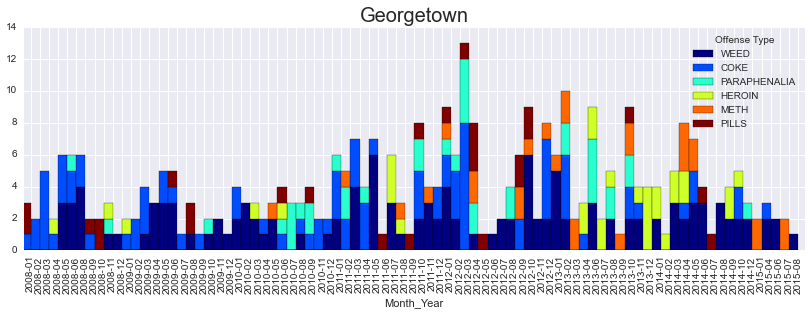

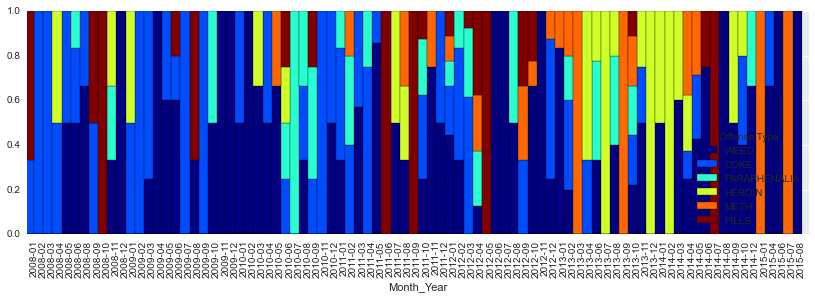

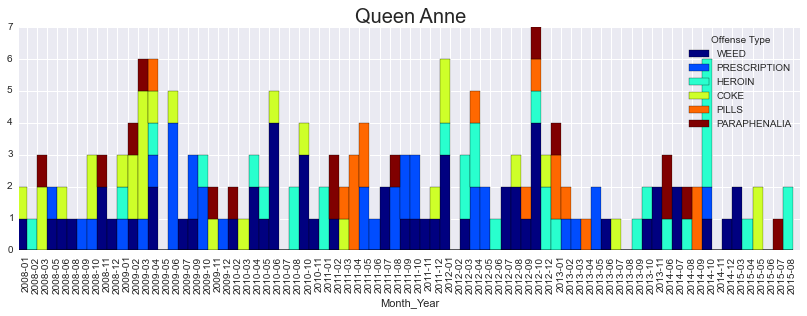

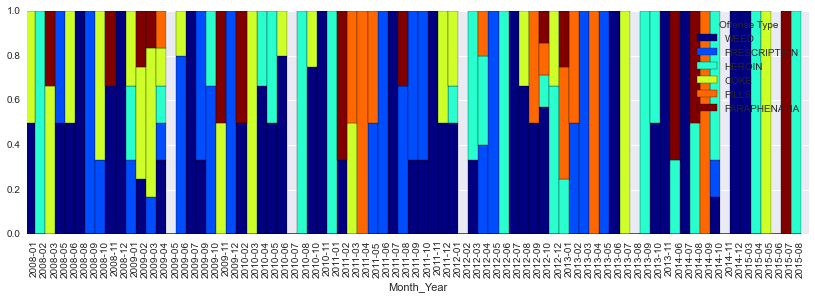

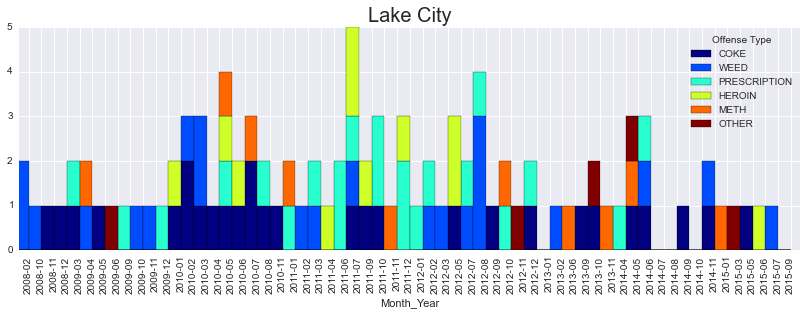

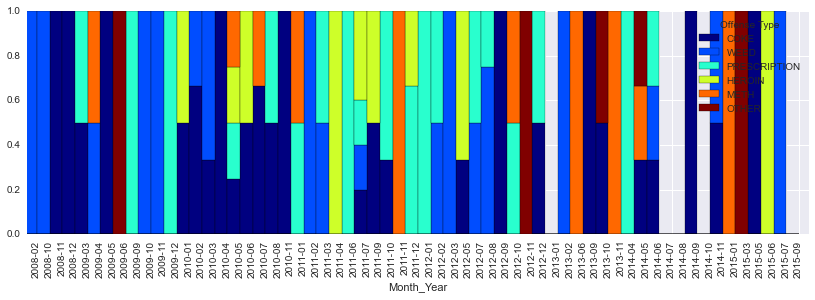

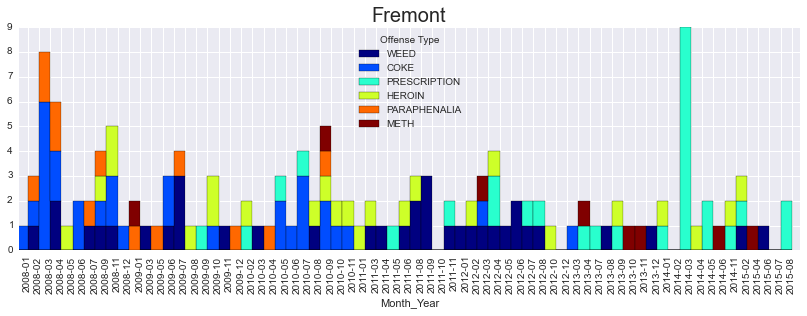

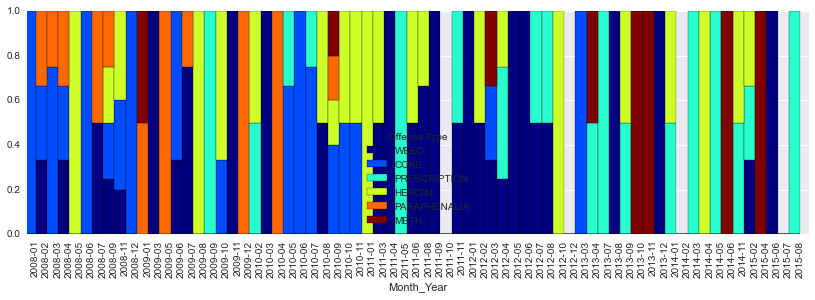

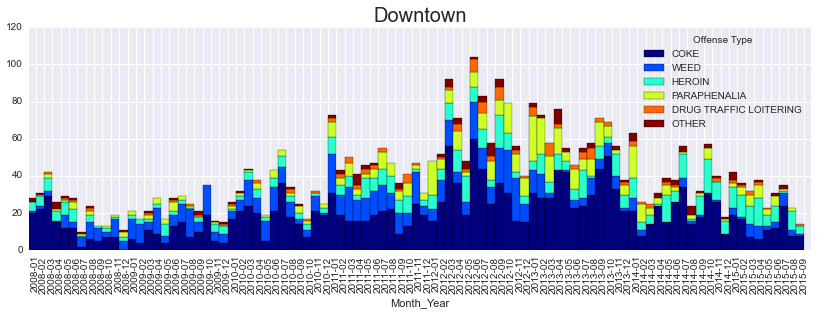

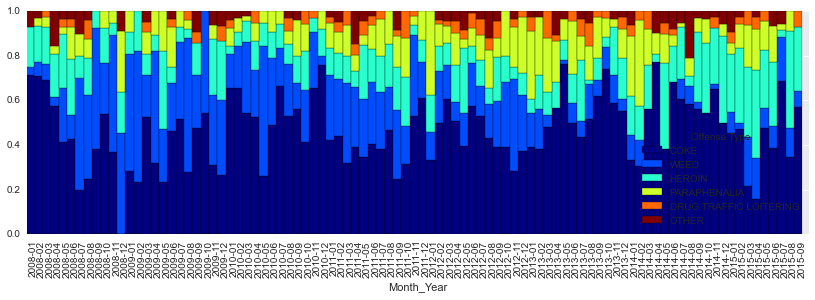

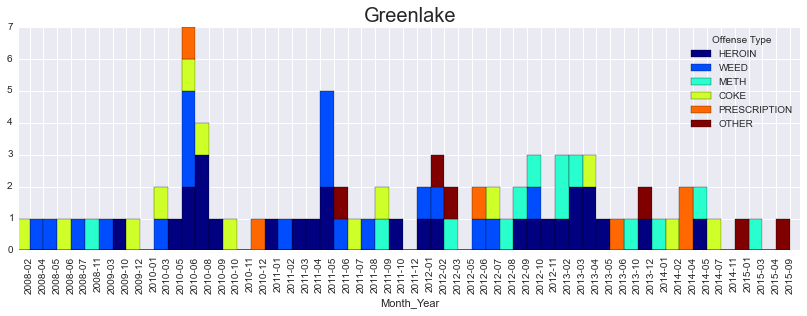

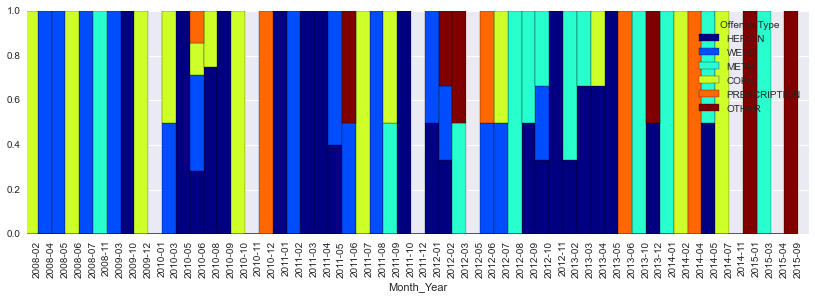

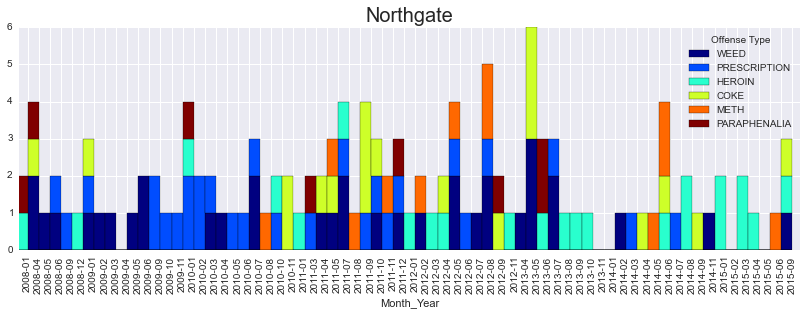

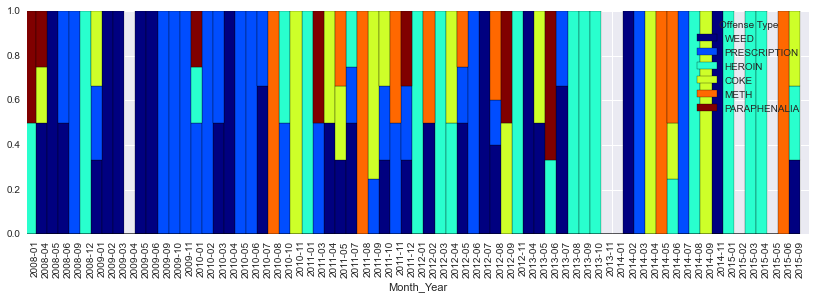

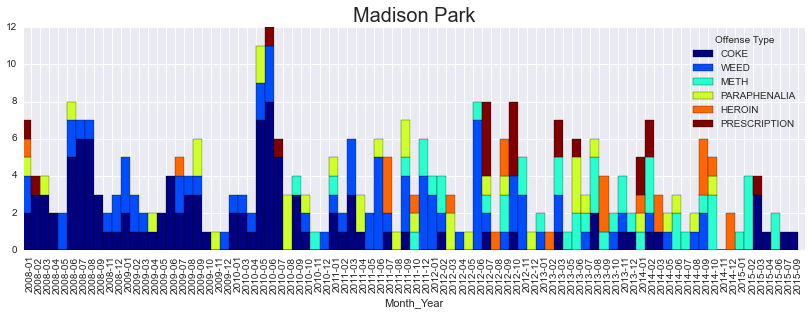

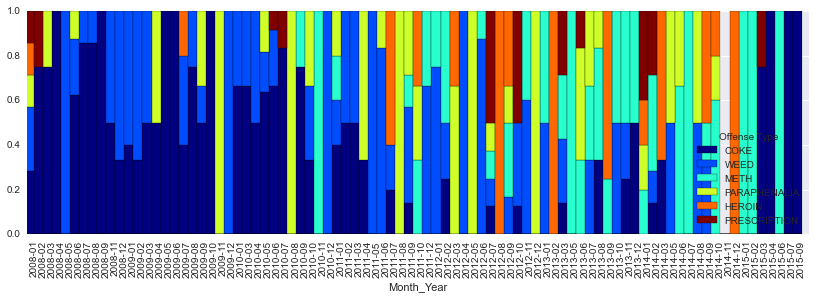

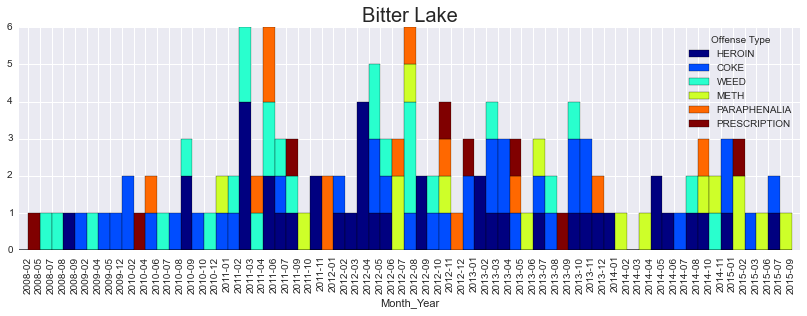

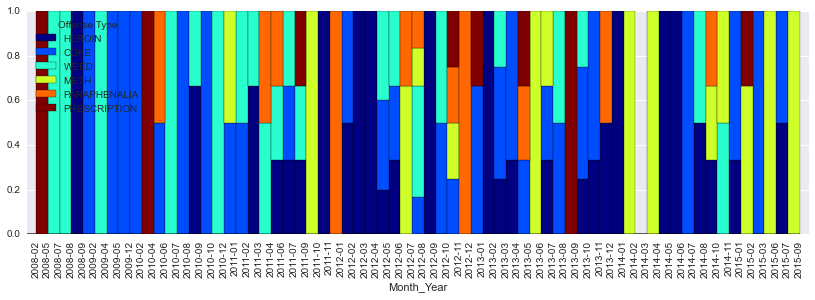

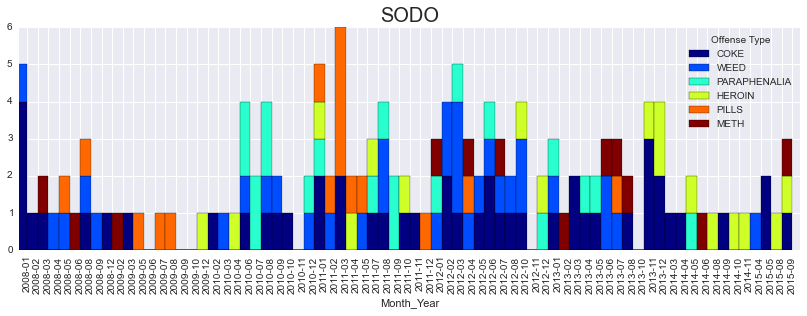

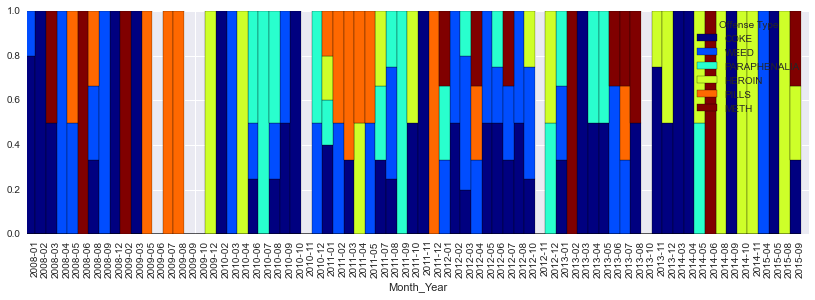

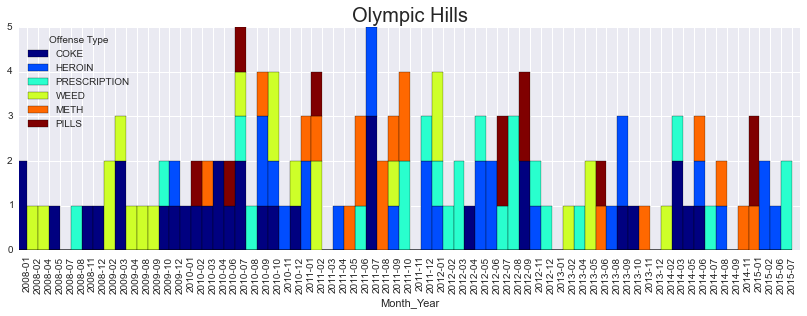

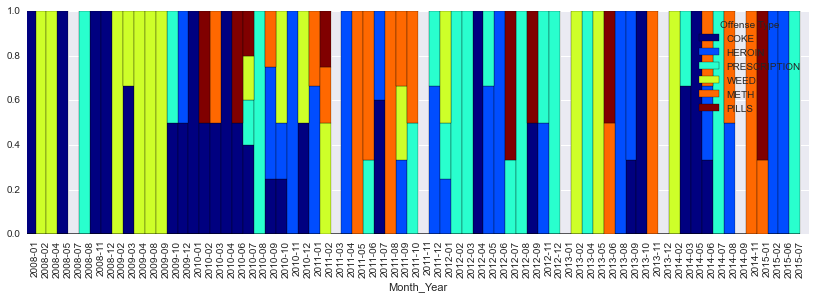

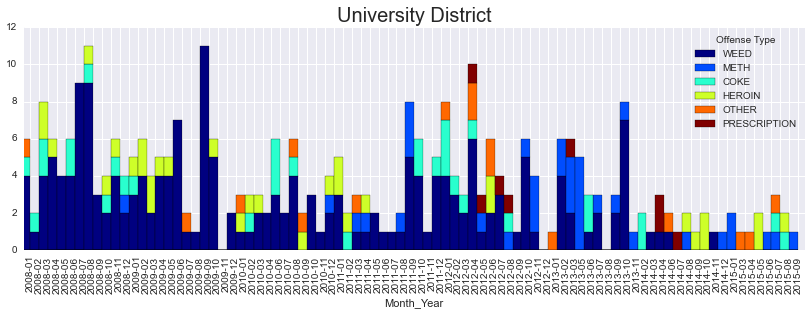

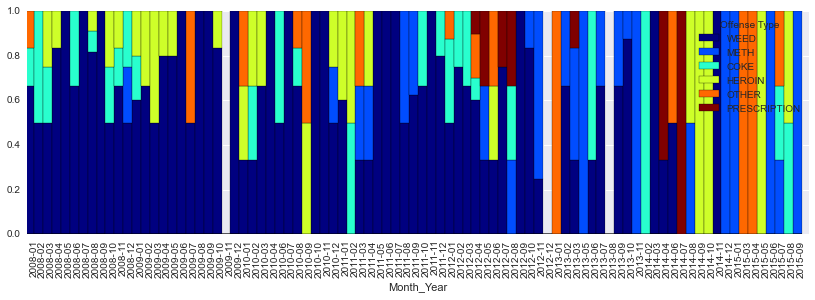

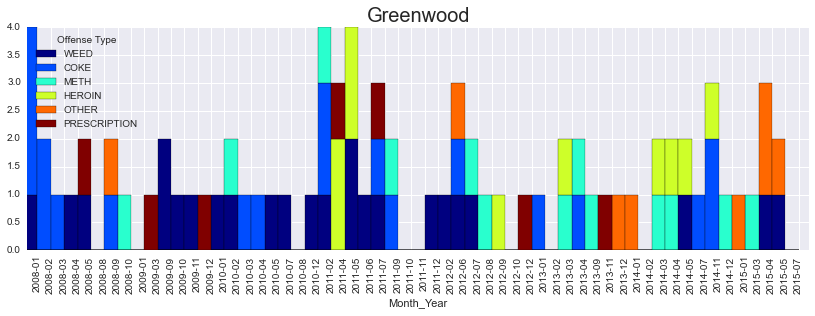

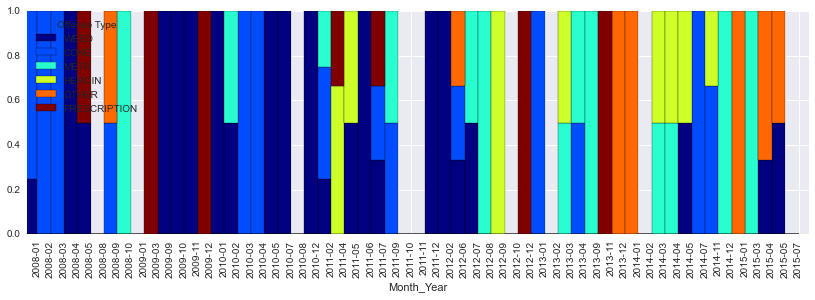

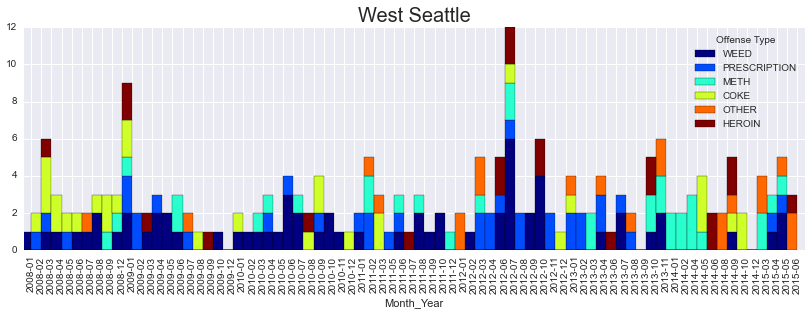

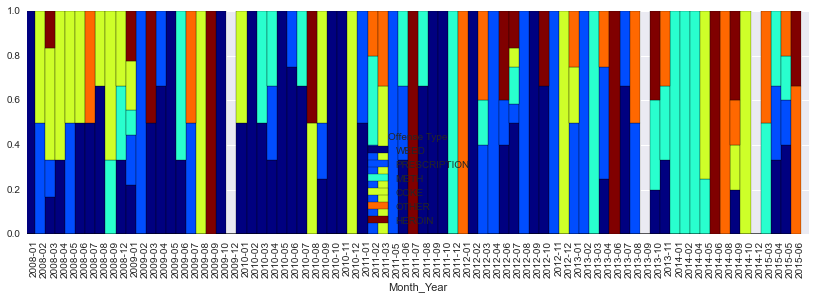

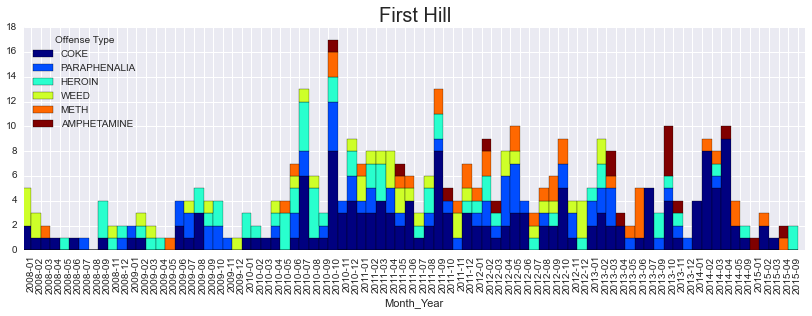

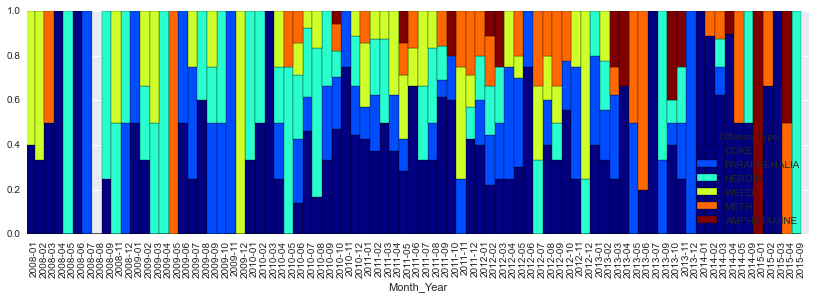

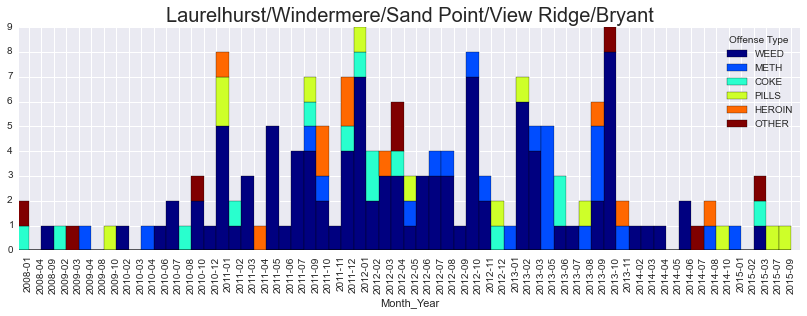

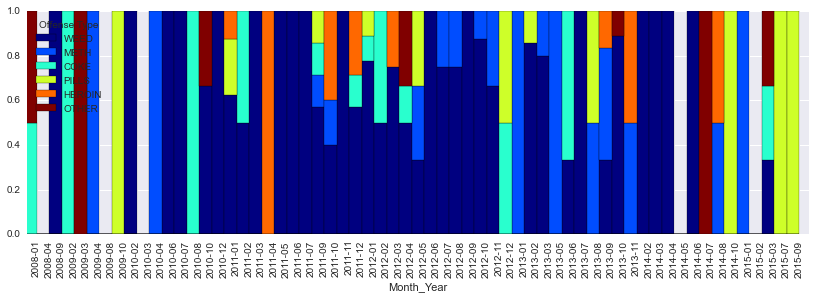

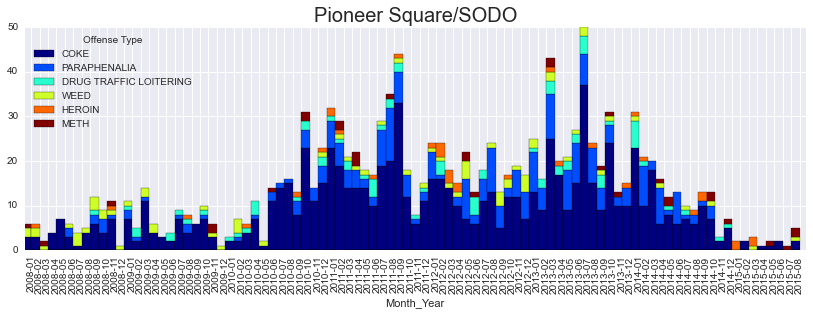

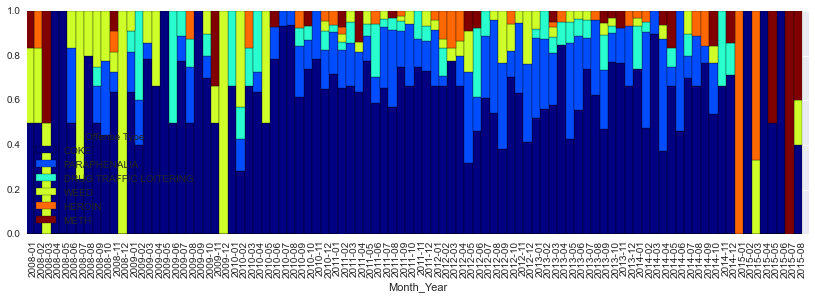

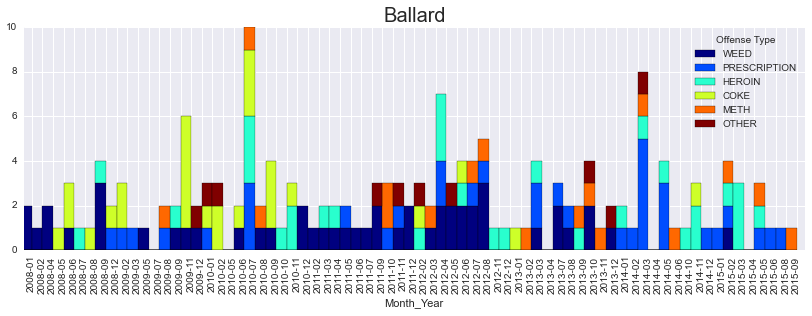

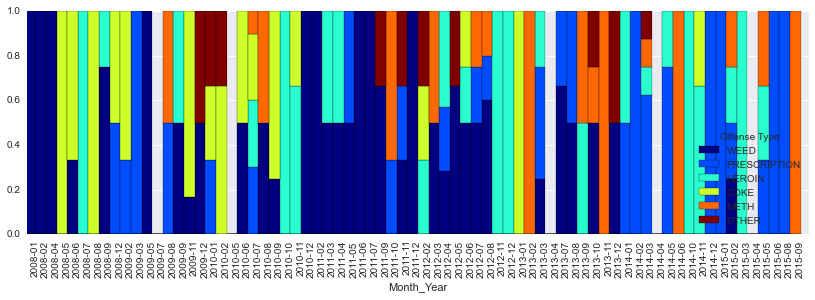

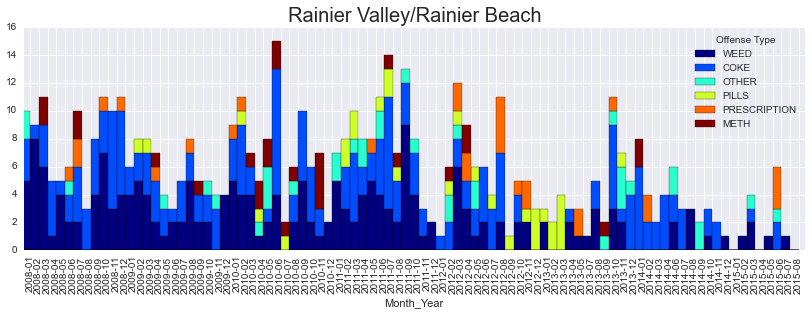

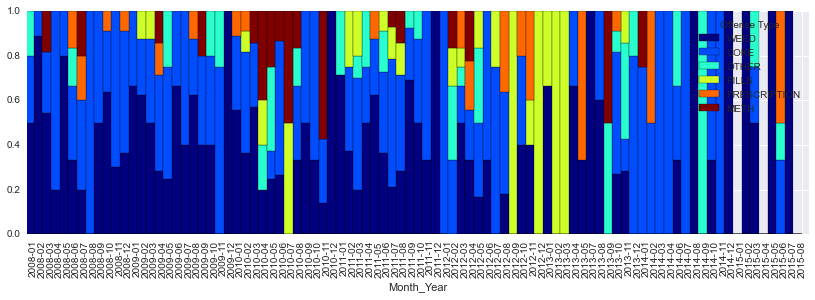

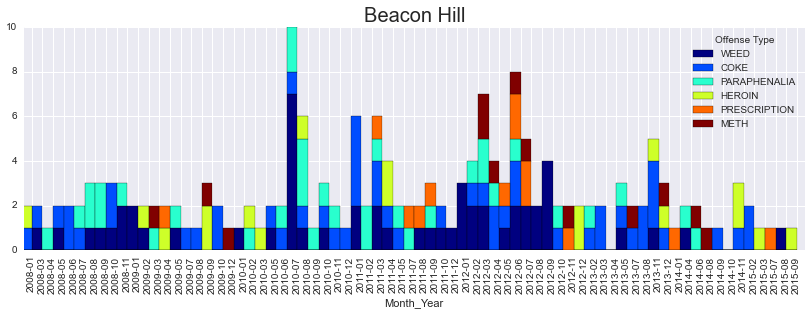

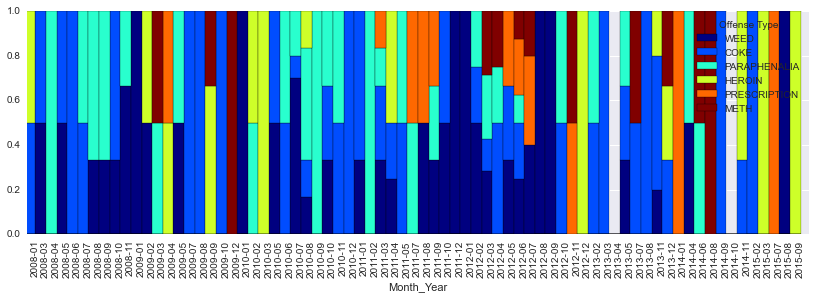

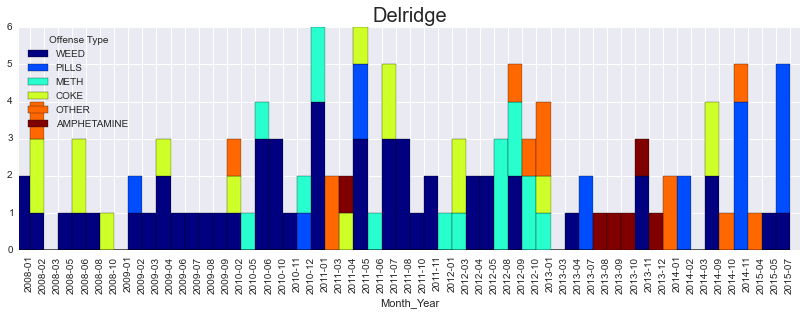

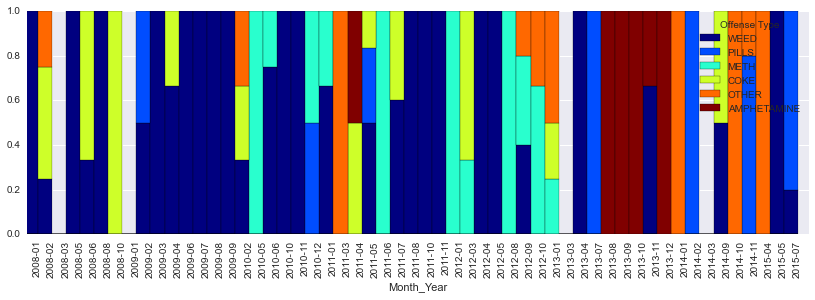

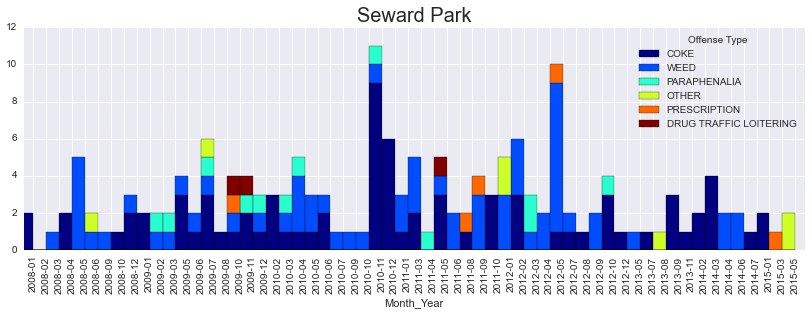

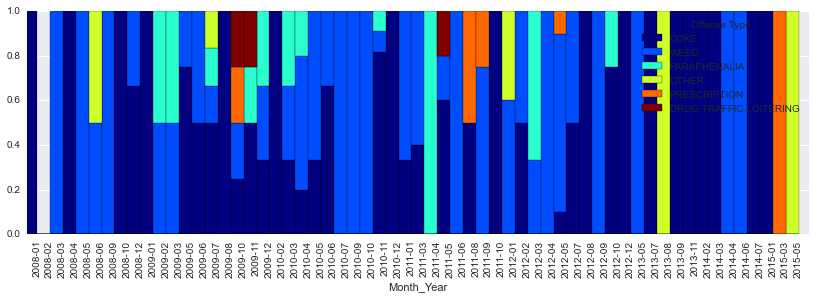

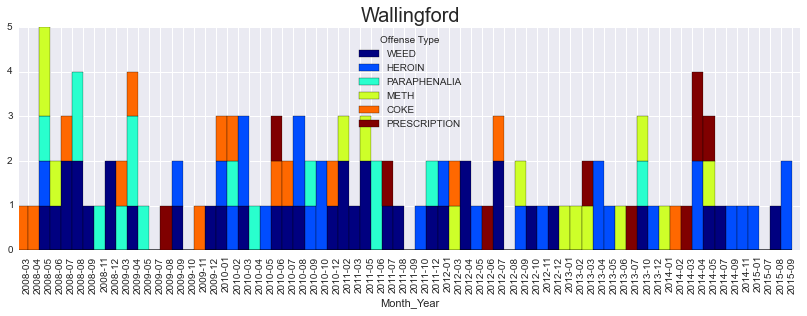

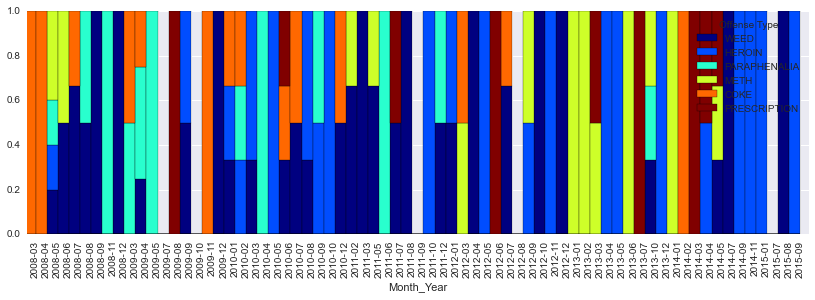

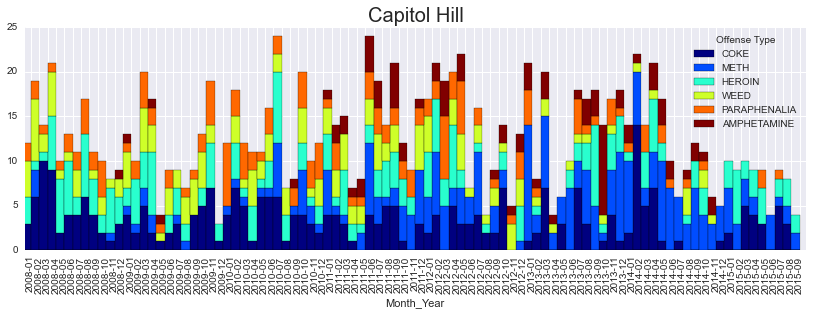

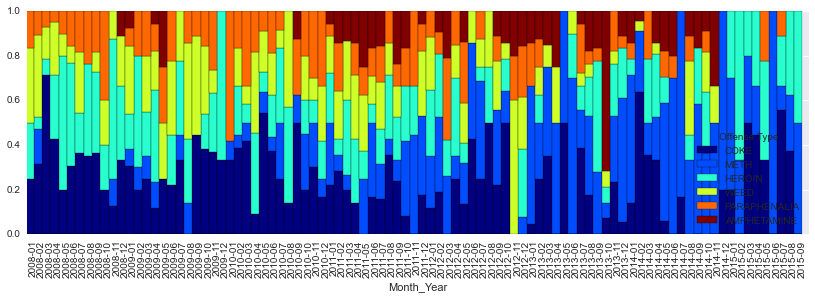

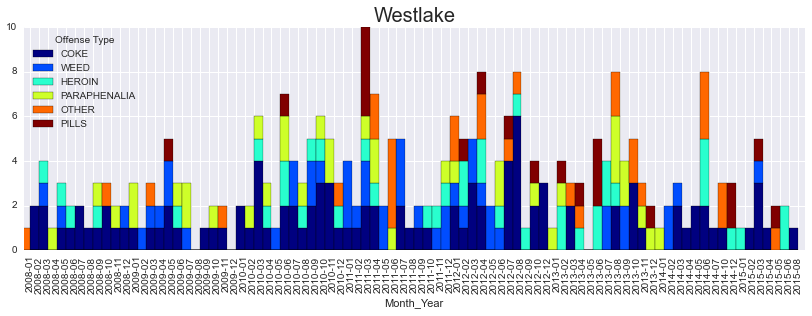

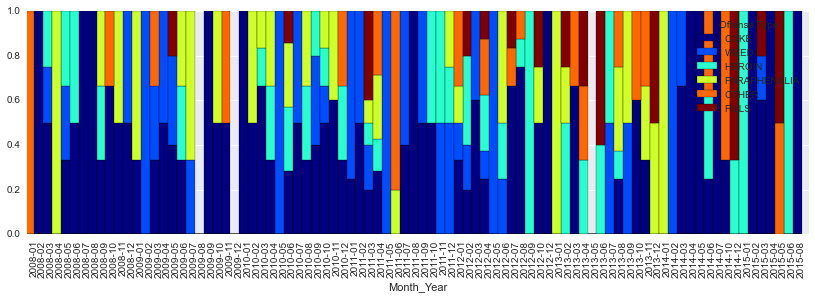

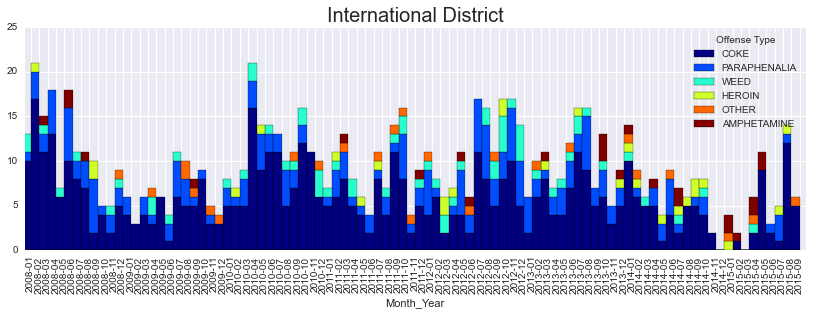

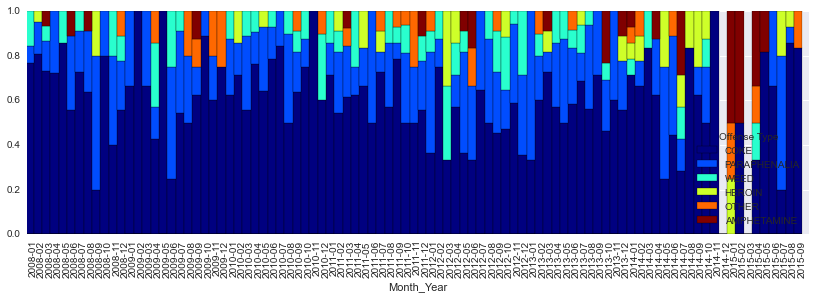

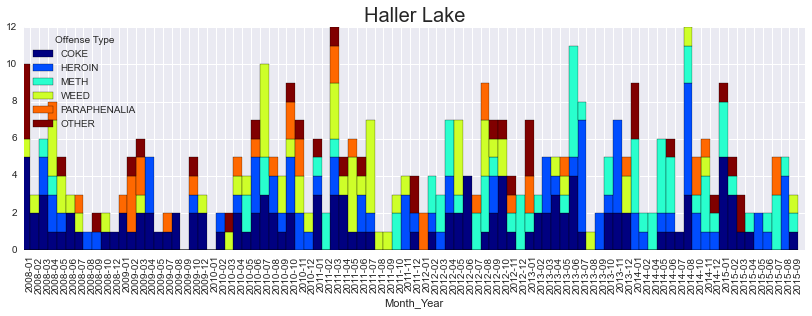

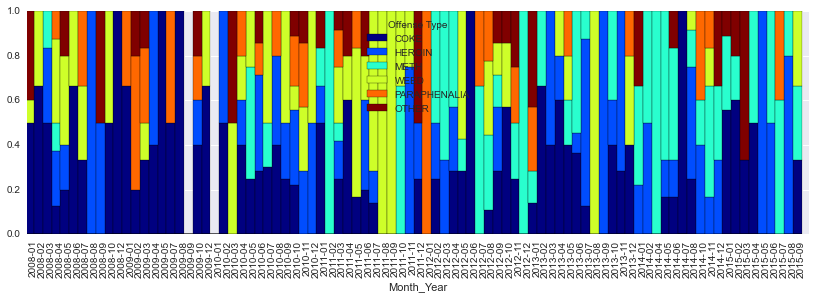

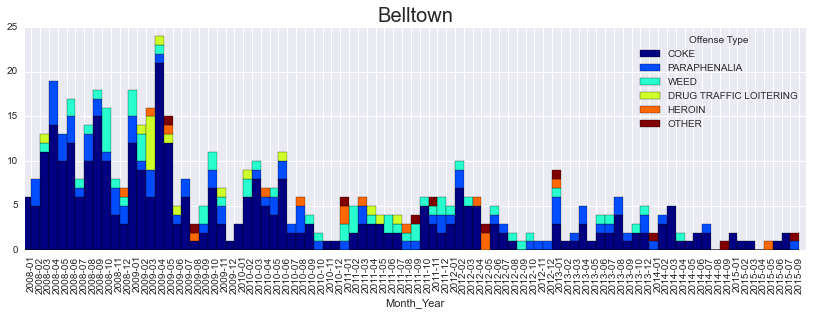

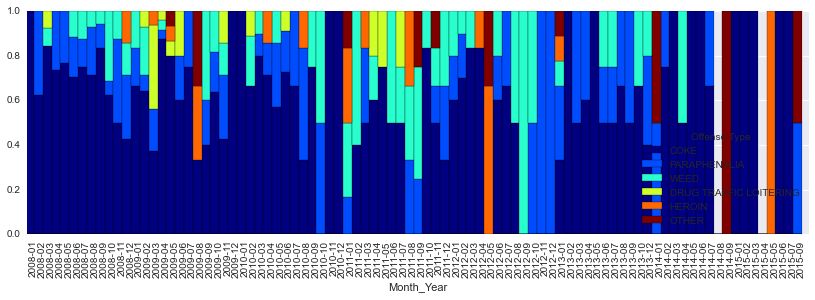

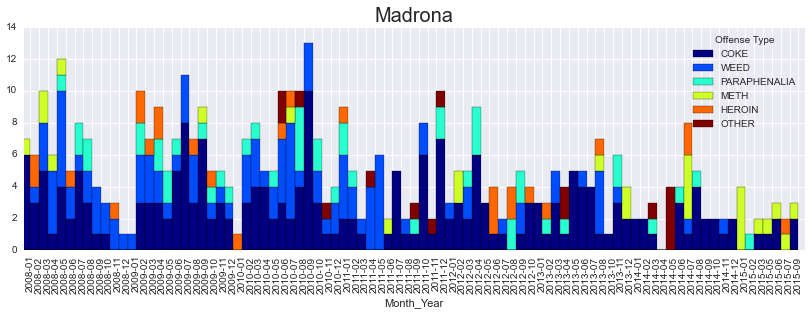

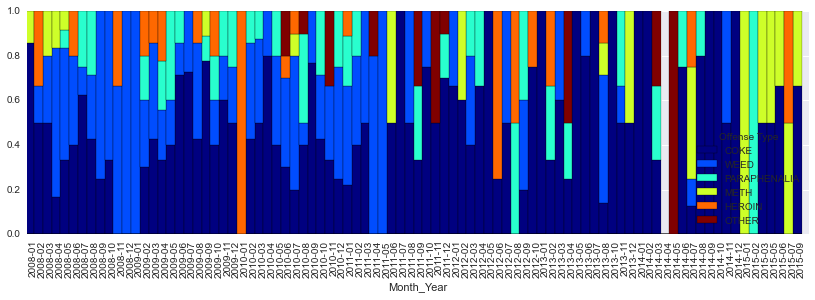

In [498]:
# SET returns all unique value of a category 
# Then we use list comprension to write all unique values into list if the value != 0 (NULL)
hoods=[hood for hood in set(SeattleDrug.Neighborhood) if hood != 0]

# Hood are the list of unique hoods in Seattle
# For every hood ... 
for hood in hoods:
    
    # ... slice out all data for that hood
    hood_dat=SeattleDrug[SeattleDrug.Neighborhood == hood]
    # Group on off type and month
    off_ts_hood=hood_dat.groupby(['Month_Year','Offense Type']).size().unstack().fillna(0)
    # Sum offense types
    s=off_ts_hood.sum(axis=0)
    s.sort(ascending=False)
    # Take top 5 for that HOOD
    top_cat = list(s.index[0:6])
    colors = plt.cm.jet(np.linspace(0, 1, len(top_cat)))
    off_ts_hood_top=off_ts_hood[top_cat]
    # Plot agg data for top 5 in that HOOD
    off_ts_hood_top.plot(figsize=(14,4),kind='bar',stacked=True,width=1,color=colors)
    plt.title(hood,fontsize=20)
    plt.show()
    # Plog norm for top 5 in HOOD
    off_ts_hood_top_n=off_ts_hood_top.div(off_ts_hood_top.sum(axis=1),axis=0)
    off_ts_hood_top_n.plot(figsize=(14,4),kind='bar',stacked=True,width=1,color=colors)
    plt.ylim([0,1])
    plt.show()
    

In [350]:
# Bin crime by 30 day window
a = SeattleDrug['Date Reported'][0]

# Import datetime
from dateutil.parser import parse
months = []
days = []
years = []
month_years = []
for date in SeattleDrug['Date Reported']:
    dt = parse(date)
    months.append(dt.month)
    days.append(dt.day)
    years.append(dt.year)
    month_years.append(dt.strftime('%b %Y'))
SeattleDrug['Month'] = months
SeattleDrug['Day'] = days
SeattleDrug['Year'] = years
SeattleDrug['MonthYear'] = month_years

# Default
district='All'

In [353]:
def timeseries(dat,per):
    ''' Category grouped by month '''
    
    # Group by crime type and district 
    cat_per_time=dat.groupby('MonthYear')['Offense Type'].value_counts(sort=True)
    t=cat_per_time.unstack().fillna(0)
        
    # Filter by crime per district
    crime_sum=t.sum(axis=0)
    crime_sum.sort()  # TODO: Don't sort time alphabetically
    
    # Large number, so let's slice the data.
    p=np.percentile(crime_sum,per)
    ix=crime_sum[crime_sum>p]
    t=t[ix.index]
    return t
    
t_all=timeseries(SeattleDrug,0)

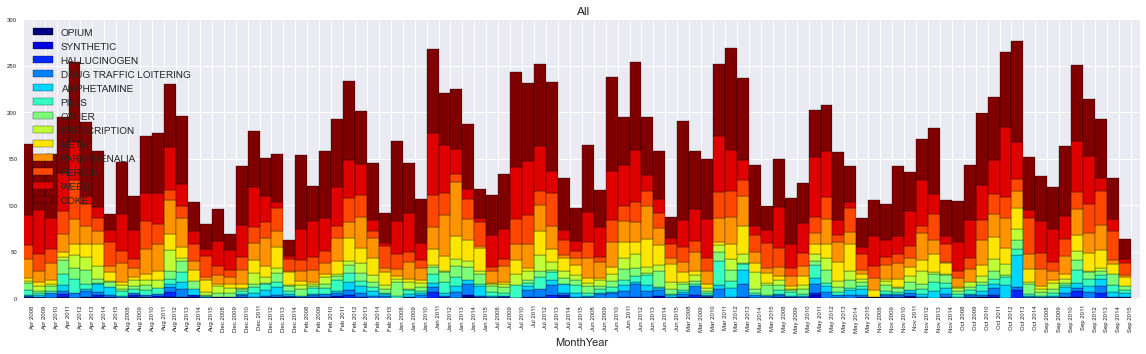

In [355]:
def drug_analysis(t,district,plot):
    #drugs=t[u'OPIUM', u'SYNTHETIC', u'HALLUCINOGEN', u'DRUG TRAFFIC LOITERING',
     #  u'AMPHETAMINE', u'PILLS', u'OTHER', u'PRESCRIPTION', u'METH',
    #  u'PARAPHENALIA', u'HEROIN', u'WEED', u'COKE']
    if plot:
        #t.index=[int(i) for i in range(t.shape[0])]
        
        colors = plt.cm.jet(np.linspace(0, 1, t.shape[1]))
        t.plot(kind='bar', stacked=True, figsize=(20,5), color=colors, width=1, title=district, fontsize=6)
    return t

drug_df_all=drug_analysis(t_all,district,True)

In [358]:
def inline_map(map):
    """
    Embeds the HTML source of the map directly into the IPython notebook.
    
    This method will not work if the map depends on any files (json data). Also this uses
    the HTML5 srcdoc attribute, which may not be supported in all browsers.
    """
    map._build_map()
    return HTML('<iframe srcdoc="{srcdoc}" style="width: 100%; height: 510px; border: none"></iframe>'.format(srcdoc=map.HTML.replace('"', '&quot;')))

def embed_map(map, path="map.html"):
    """
    Embeds a linked iframe to the map into the IPython notebook.
    
    Note: this method will not capture the source of the map into the notebook.
    This method should work for all maps (as long as they use relative urls).
    """
    map.create_map(path=path)
    return HTML('<iframe src="files/{path}" style="width: 100%; height: 510px; border: none"></iframe>'.format(path=path))

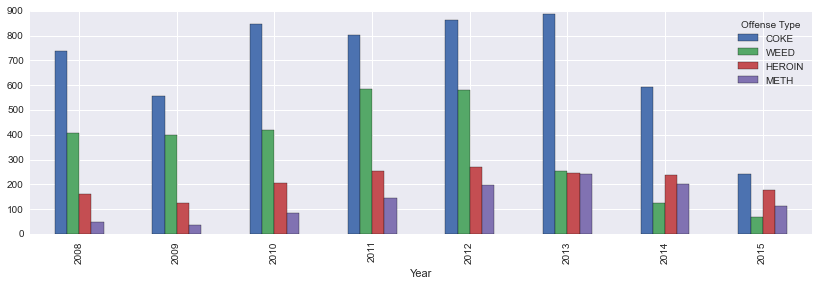

In [359]:
crime_by_year=SeattleDrug.groupby(['Year','Offense Type']).size().unstack().fillna(0)
crime_by_year[['COKE', 'WEED', 'HEROIN','METH']].plot(figsize=(14,4),kind='bar')

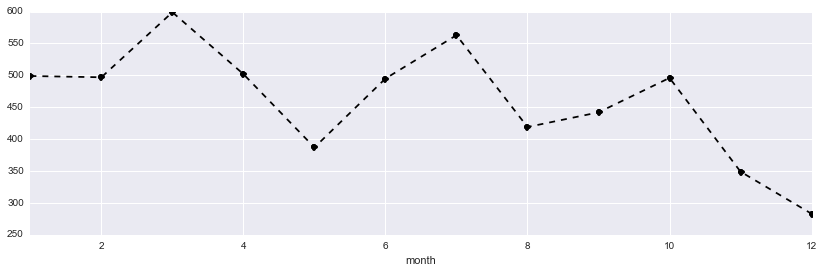

In [360]:
coke_crime=SeattleDrug[SeattleDrug['Offense Type']=='COKE']
coke_crime_by_day=coke_crime.groupby('month').size()
coke_crime_by_day.plot(figsize=(14,4),color='k',style='--o')

In [361]:
coke_pairs=coke_crime[['Latitude','Longitude']]
weed_pairs=weed_crime[['Latitude','Longitude']]
meth_pairs=meth_crime[['Latitude','Longitude']]
her_pairs=her_crime[['Latitude','Longitude']]

In [369]:
center = [coke_pairs.Latitude.median(),coke_pairs.Longitude.median()]
df_map = folium.Map(location=center,tiles='Mapbox',zoom_start=12,API_key='cray.16710dba',width=1060,height=1000)
for pair in coke_pairs.iterrows():
    pair=pair[1]
    df_map.circle_marker([pair[0], pair[1]], radius = .1, fill_opacity=1, line_color = 'red', fill_color = 'red')
for pair in weed_pairs.iterrows():
    pair=pair[1]
    df_map.circle_marker([pair[0], pair[1]], radius = .1, fill_opacity=1, line_color = 'green', fill_color = 'green')
for pair in meth_pairs.iterrows():
    pair=pair[1]
    df_map.circle_marker([pair[0], pair[1]], radius = .1, fill_opacity=1, line_color = 'blue', fill_color = 'blue')
for pair in her_pairs.iterrows():
    pair=pair[1]
    df_map.circle_marker([pair[0], pair[1]], radius = .1, fill_opacity=1, line_color = 'yellow', fill_color = 'yellow')

In [370]:
df_map.create_map()
embed_map(df_map)